In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df_original = pd.read_parquet("./dataset_manhattan_original.parquet", engine = 'auto')

In [45]:
df = df_original

In [4]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,...,duration_m,day_of_year,day_week,day_type,PU_borough,PU_zone,PU_service_zone,DO_borough,DO_zone,DO_service_zone
0,2022-11-20 14:50:04,2022-11-20 15:07:36,1.0,2.12,1.0,142,161,2,12.0,0.00,...,17.533333,11-20,6,weekend,Manhattan,Lincoln Square East,Yellow Zone,Manhattan,Midtown Center,Yellow Zone
1,2022-05-05 22:30:55,2022-05-05 22:43:58,1.0,1.40,1.0,142,161,1,9.5,3.30,...,13.050000,05-05,3,workday,Manhattan,Lincoln Square East,Yellow Zone,Manhattan,Midtown Center,Yellow Zone
2,2022-10-15 23:35:51,2022-10-15 23:44:19,1.0,1.20,1.0,142,161,1,7.5,2.25,...,8.466666,10-15,5,weekend,Manhattan,Lincoln Square East,Yellow Zone,Manhattan,Midtown Center,Yellow Zone
3,2022-06-22 09:05:41,2022-06-22 09:20:37,2.0,1.36,1.0,142,161,1,10.5,2.76,...,14.933333,06-22,2,workday,Manhattan,Lincoln Square East,Yellow Zone,Manhattan,Midtown Center,Yellow Zone
4,2022-01-31 23:14:25,2022-01-31 23:18:07,1.0,0.81,1.0,142,161,1,4.5,1.00,...,3.700000,01-31,0,workday,Manhattan,Lincoln Square East,Yellow Zone,Manhattan,Midtown Center,Yellow Zone


C:\Users\a\AppData\Local\Temp\ipykernel_9356\2653987739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'spearman').round(2)


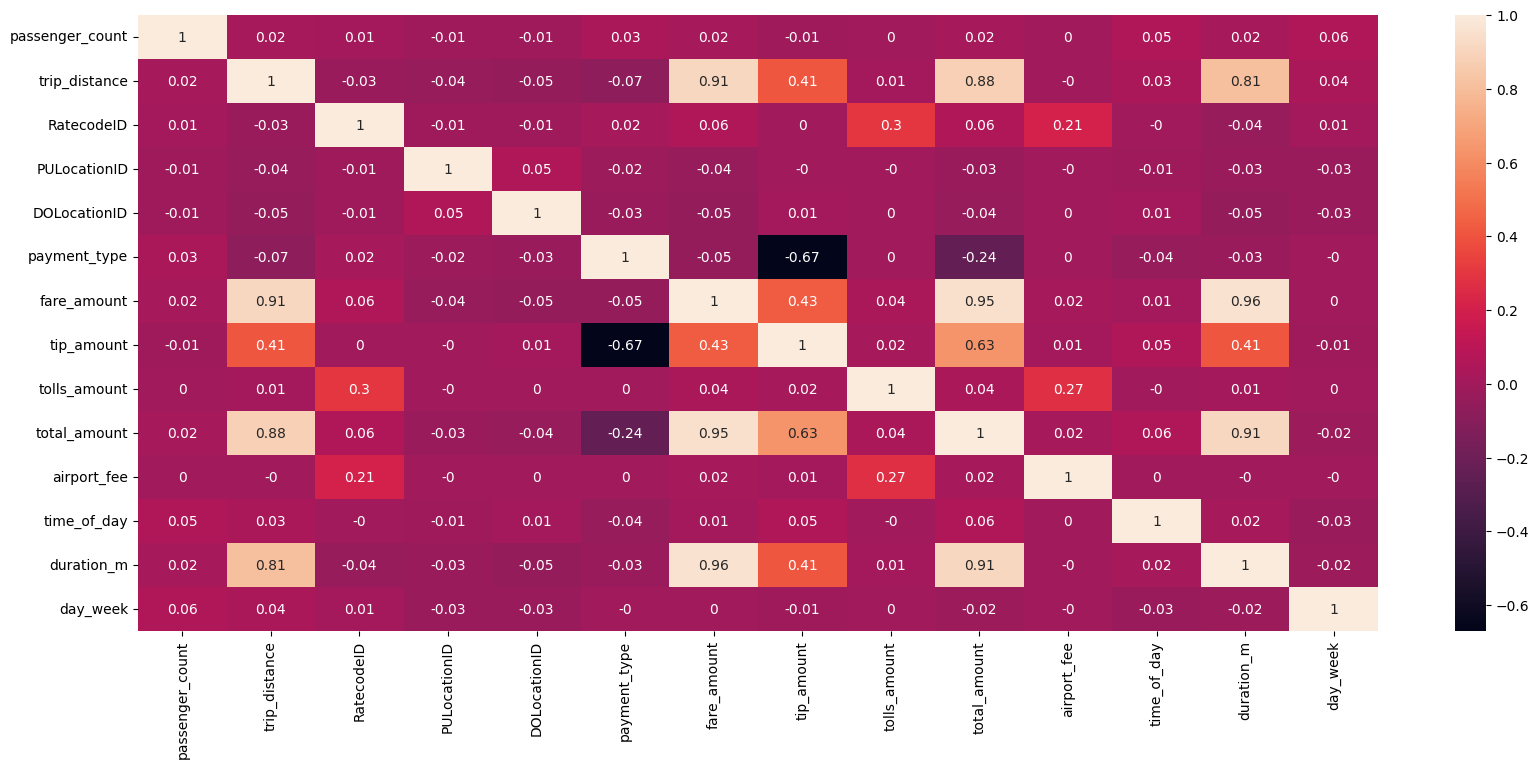

In [4]:
correlation_matrix = df.corr(method = 'spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

C:\Users\a\AppData\Local\Temp\ipykernel_9356\2869251614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'kendall').round(2)
c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
c:\Users\a\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5219: RuntimeWarning: invalid value encountered in sqrt
  z = con_minus_dis / np.sqrt(var)


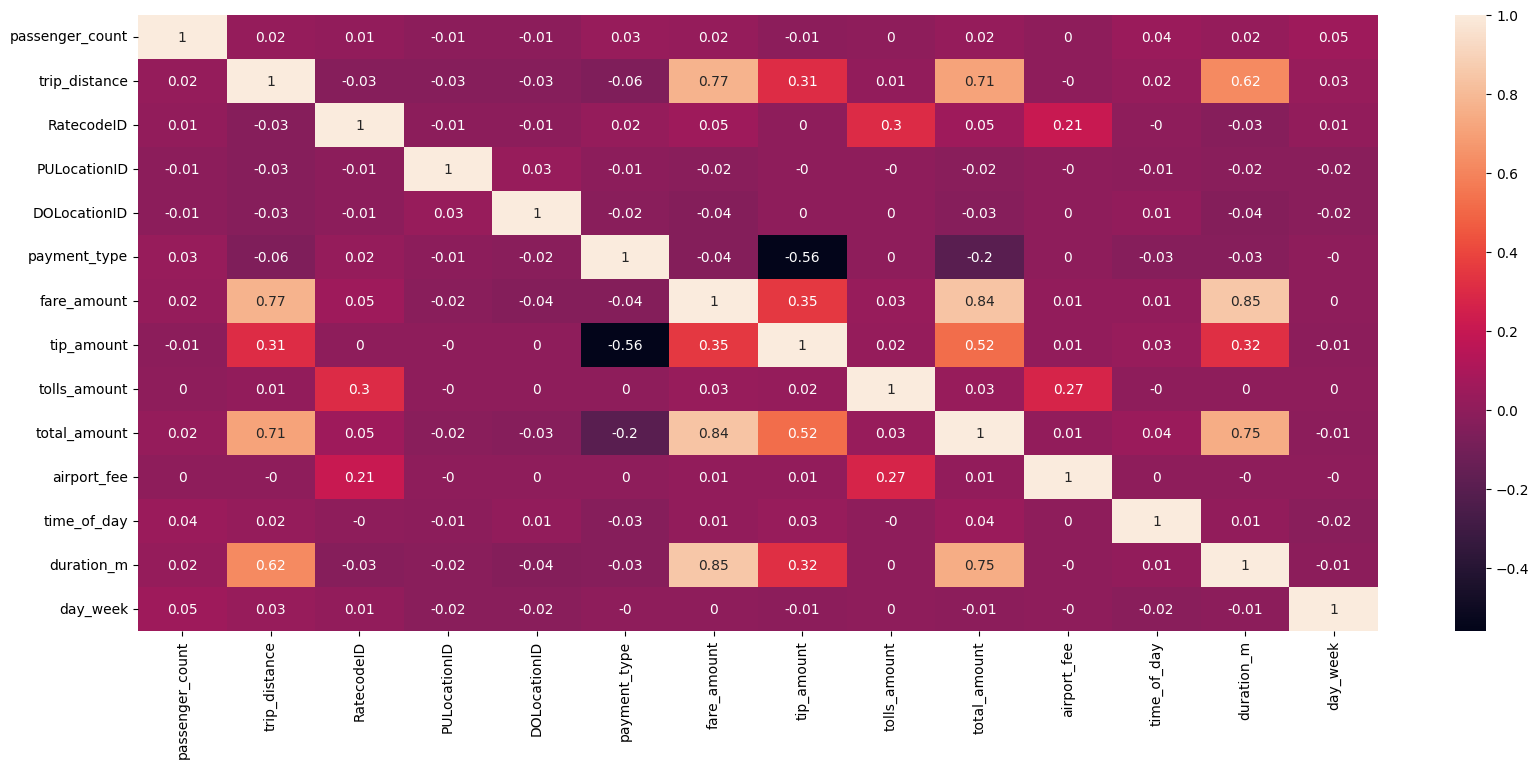

In [5]:
correlation_matrix = df.corr(method = 'kendall').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

In [6]:
df.corrwith(df.total_amount)

C:\Users\a\AppData\Local\Temp\ipykernel_9356\3267678259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df.total_amount)


passenger_count    0.014768
trip_distance      0.832266
RatecodeID         0.173241
PULocationID      -0.030015
DOLocationID      -0.041592
payment_type      -0.197243
fare_amount        0.960103
tip_amount         0.634311
tolls_amount       0.160736
total_amount       1.000000
airport_fee        0.082641
time_of_day        0.040866
duration_m         0.844073
day_week          -0.008380
dtype: float64

In [5]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer,MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge
from sklearn.tree import BaseDecisionTree, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc,mean_absolute_error,mean_squared_error,r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [6]:
def set_linear_regression(X_train,y_train):
    import numpy as np
    regr = LinearRegression()
    
    regr.fit(X_train, y_train)

    return regr

def scale_set(X_train, X_test):
  scaler=StandardScaler()  

  X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
  X_test_sc=scaler.transform(X_test)
  return (X_train_sc, X_test_sc)

def get_metrics(ground_truth : list,predictions:list):
  print("Mean squared error: %.2f" % mean_squared_error(ground_truth, predictions))
  print("Mean absolute error: %.2f" %  mean_absolute_error(ground_truth, predictions))
  # The coefficient of determination: 1 is perfect prediction
  print("r2 score: %.2f" % r2_score(ground_truth, predictions))
  return

In [7]:
df['passenger_count']=  df['passenger_count'].astype('int')

In [8]:
df = pd.get_dummies(df, columns = ['passenger_count'])
df = pd.get_dummies(df, columns = ['payment_type'])
df = pd.get_dummies(df, columns = ['day_type'])

In [9]:
df= df.drop(['total_amount','tolls_amount', 'airport_fee',\
         'tpep_pickup_datetime'	,'tpep_dropoff_datetime', 'date', \
            'DO_service_zone','day_of_year','DO_borough','PU_borough','DO_zone','PU_zone','PU_service_zone'], axis =1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['fare_amount','tip_amount','month'], axis = 1), df['fare_amount'])

In [11]:
(X_train_sc, X_test_sc) = scale_set(X_train, X_test)

In [12]:
regr = set_linear_regression(X_train_sc, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 10.263302060655127
Coefficients: 
 [ 2.44826132e+00  1.06701905e+00  1.65256513e-03  1.37740627e-03
 -2.84679310e-02  2.86749143e+00  4.91968576e-04 -6.61856500e+09
 -2.05151076e+10 -1.66994492e+10 -9.14650474e+09 -6.09314182e+09
 -6.35748355e+09 -5.20700293e+09  8.53718253e+11  8.53718253e+11
  1.27643506e+10  4.02798764e+10  4.12088147e+10]


In [13]:
predictions = regr.predict(X_test_sc)
get_metrics(y_test, predictions)

Mean squared error: 1.99
Mean absolute error: 0.38
r2 score: 0.93


In [14]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train_sc, y_train)

Ridge()

In [15]:
ridge_predictions = clf.predict(X_test_sc)
get_metrics(y_test, ridge_predictions)

Mean squared error: 1.99
Mean absolute error: 0.38
r2 score: 0.93


# Random Forest

In [16]:
def set_random_forest_regressor(X_train : list, y_train: list):
  rf = RandomForestRegressor(n_estimators = 100,n_jobs = -1, max_depth = 4, random_state = 42)
  rf.fit(X_train, y_train)
  return rf

In [17]:
rf = set_random_forest_regressor(X_train, y_train)

In [18]:
rf_predictions = rf.predict(X_test)
get_metrics(y_test, rf_predictions)

Mean squared error: 2.27
Mean absolute error: 0.86
r2 score: 0.92


In [19]:
tree = rf.estimators_[5]
print('La profundidad de este árbol es:', tree.tree_.max_depth)

La profundidad de este árbol es: 4


In [20]:
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: duration_m           Importance: 0.74
Variable: trip_distance        Importance: 0.18
Variable: RatecodeID           Importance: 0.07
Variable: PULocationID         Importance: 0.0
Variable: DOLocationID         Importance: 0.0
Variable: time_of_day          Importance: 0.0
Variable: day_week             Importance: 0.0
Variable: passenger_count_0    Importance: 0.0
Variable: passenger_count_1    Importance: 0.0
Variable: passenger_count_2    Importance: 0.0
Variable: passenger_count_3    Importance: 0.0
Variable: passenger_count_4    Importance: 0.0
Variable: passenger_count_5    Importance: 0.0
Variable: passenger_count_6    Importance: 0.0
Variable: payment_type_1       Importance: 0.0
Variable: payment_type_2       Importance: 0.0
Variable: day_type_holiday     Importance: 0.0
Variable: day_type_weekend     Importance: 0.0
Variable: day_type_workday     Importance: 0.0


In [21]:
train_important = X_train.loc[:,["trip_distance", "duration_m","RatecodeID"]]
test_important =X_test.loc[:,["trip_distance", "duration_m","RatecodeID"]]
# Extraer las dos características más importantes
rf_most_important = set_random_forest_regressor(train_important, y_train)

In [22]:
rf_important_predictions = rf_most_important.predict(test_important)
get_metrics(y_test, rf_important_predictions)

Mean squared error: 2.27
Mean absolute error: 0.86
r2 score: 0.92


In [24]:
def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

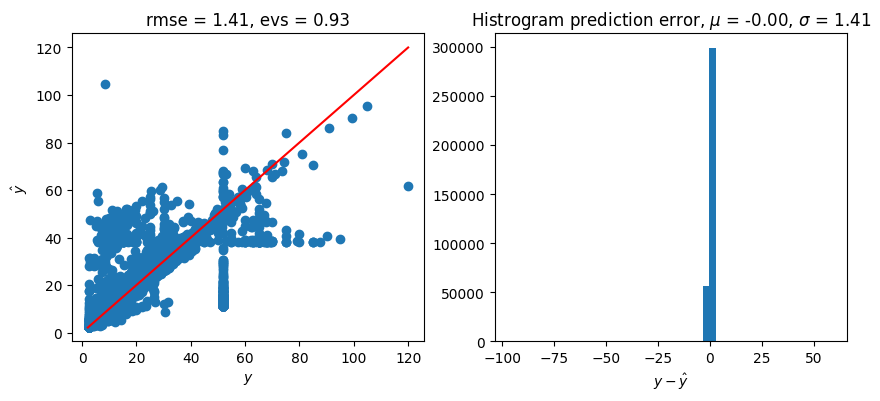

In [25]:
plot_prediction_analysis(y_test,predictions )

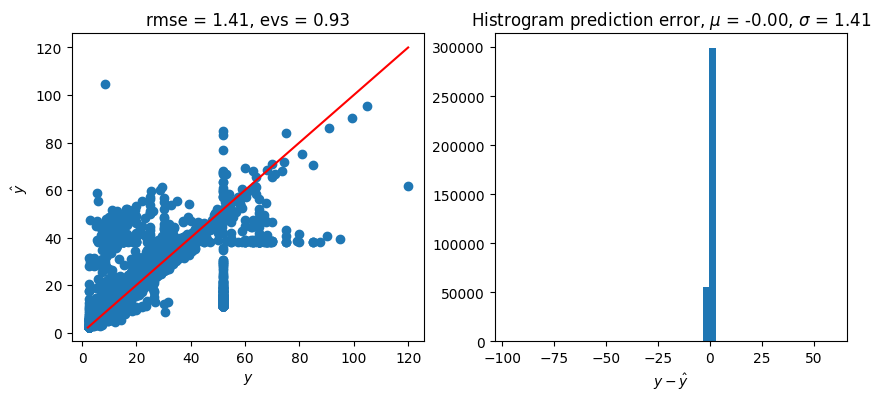

In [26]:
plot_prediction_analysis(y_test,ridge_predictions )

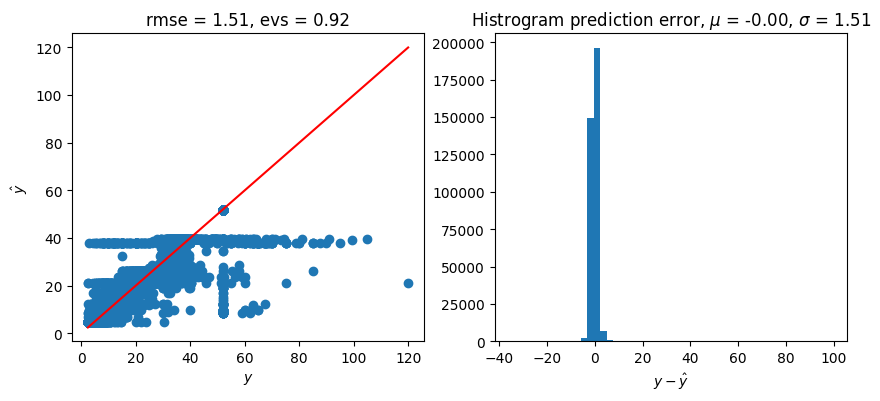

In [27]:
plot_prediction_analysis(y_test,rf_important_predictions )

In [28]:
def plot_learning_curve(model, X_train, X_test, y_train, y_test, nsteps=1, figsize=(6, 5), title=''):
    train_error, test_error = [], []
    number_of_samples = []
    m_samples = X_train.shape[0]
    for m in range(int(m_samples/nsteps), m_samples+1, int(m_samples/nsteps)):
        number_of_samples.append(m)
        model.fit(X_train.iloc[:m,:], y_train.iloc[:m])
        y_train_pred = model.predict(X_train.iloc[:m,:])
        train_error.append(np.sqrt(mean_squared_error(y_train.iloc[:m], y_train_pred)))
        y_test_pred = model.predict(X_test)
        test_error.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    plt.figure(figsize=figsize)
    plt.plot(number_of_samples, train_error, label='Training data')
    plt.plot(number_of_samples, test_error, label='Test data')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()
    if title!='':
        plt.title(title)

In [29]:
rf_plot = RandomForestRegressor(n_estimators = 100,n_jobs = -1, max_depth = 4, random_state = 42)

In [30]:
regr_plot = LinearRegression()

In [35]:
clf_plot = Ridge(alpha=1.0)

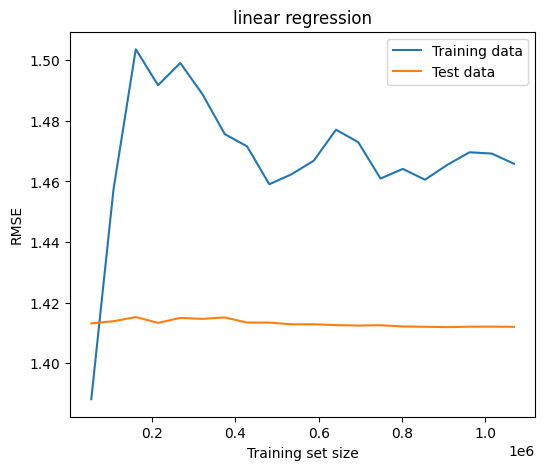

In [32]:
plot_learning_curve(regr_plot, X_train, X_test, y_train, y_test, nsteps=20, title = "linear regression")

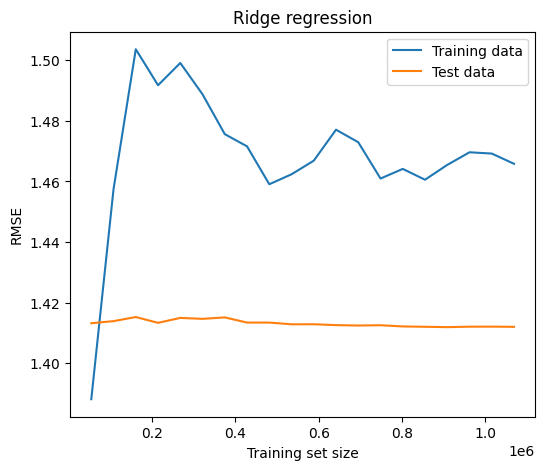

In [36]:
plot_learning_curve(clf_plot, X_train, X_test, y_train, y_test, nsteps=20, title = "Ridge regression")

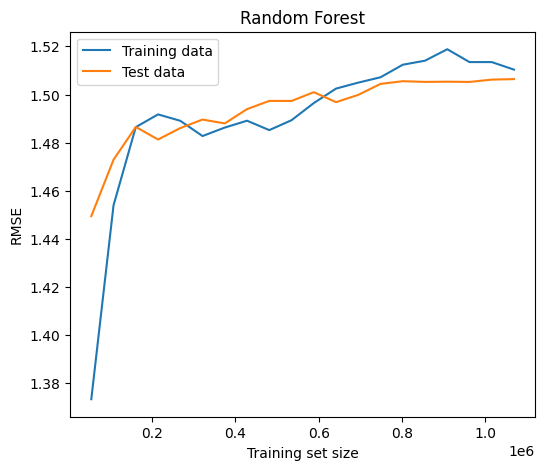

In [37]:
plot_learning_curve(rf_plot,train_important, test_important, y_train, y_test, nsteps=20, title = 'Random Forest')

# Clustering

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [98]:
df_sample= df_original.drop(['total_amount','tolls_amount', 'airport_fee',\
         'tpep_pickup_datetime'	,'tpep_dropoff_datetime', \
            'DO_service_zone','day_of_year','DO_borough','PU_borough','DO_zone','PU_zone','PU_service_zone'], axis =1)

In [99]:
df_sample =df_sample.sample(int(np.floor(len(df)/100)))

In [100]:
df_sample = df_sample.drop(labels=['day_type','month', 'trip_distance'], axis = 1)

In [101]:
df_sample

,passenger_count,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,date,time_of_day,duration_m,day_week
923390,3.0,1.0,68,144,1,16.5,3.96,2022-06-16,10,26.500000,3
755582,2.0,1.0,142,50,1,9.5,1.00,2022-08-30,11,12.016666,1
1035901,1.0,1.0,239,151,1,5.0,2.20,2022-07-23,20,4.100000,5
729584,1.0,1.0,142,143,1,6.5,2.00,2022-07-25,15,7.716667,0
905305,1.0,1.0,233,233,1,4.5,2.00,2022-07-14,12,3.983333,3
...,...,...,...,...,...,...,...,...,...,...,...
43993,1.0,1.0,170,161,2,3.5,0.00,2022-03-07,18,5.300000,0
1088325,1.0,1.0,230,246,2,9.0,0.00,2022-11-30,9,12.316667,2
458965,3.0,1.0,87,261,2,5.0,0.00,2022-09-25,19,6.283333,6
382427,1.0,1.0,161,229,1,6.5,2.16,2022-04-01,17,7.566667,4


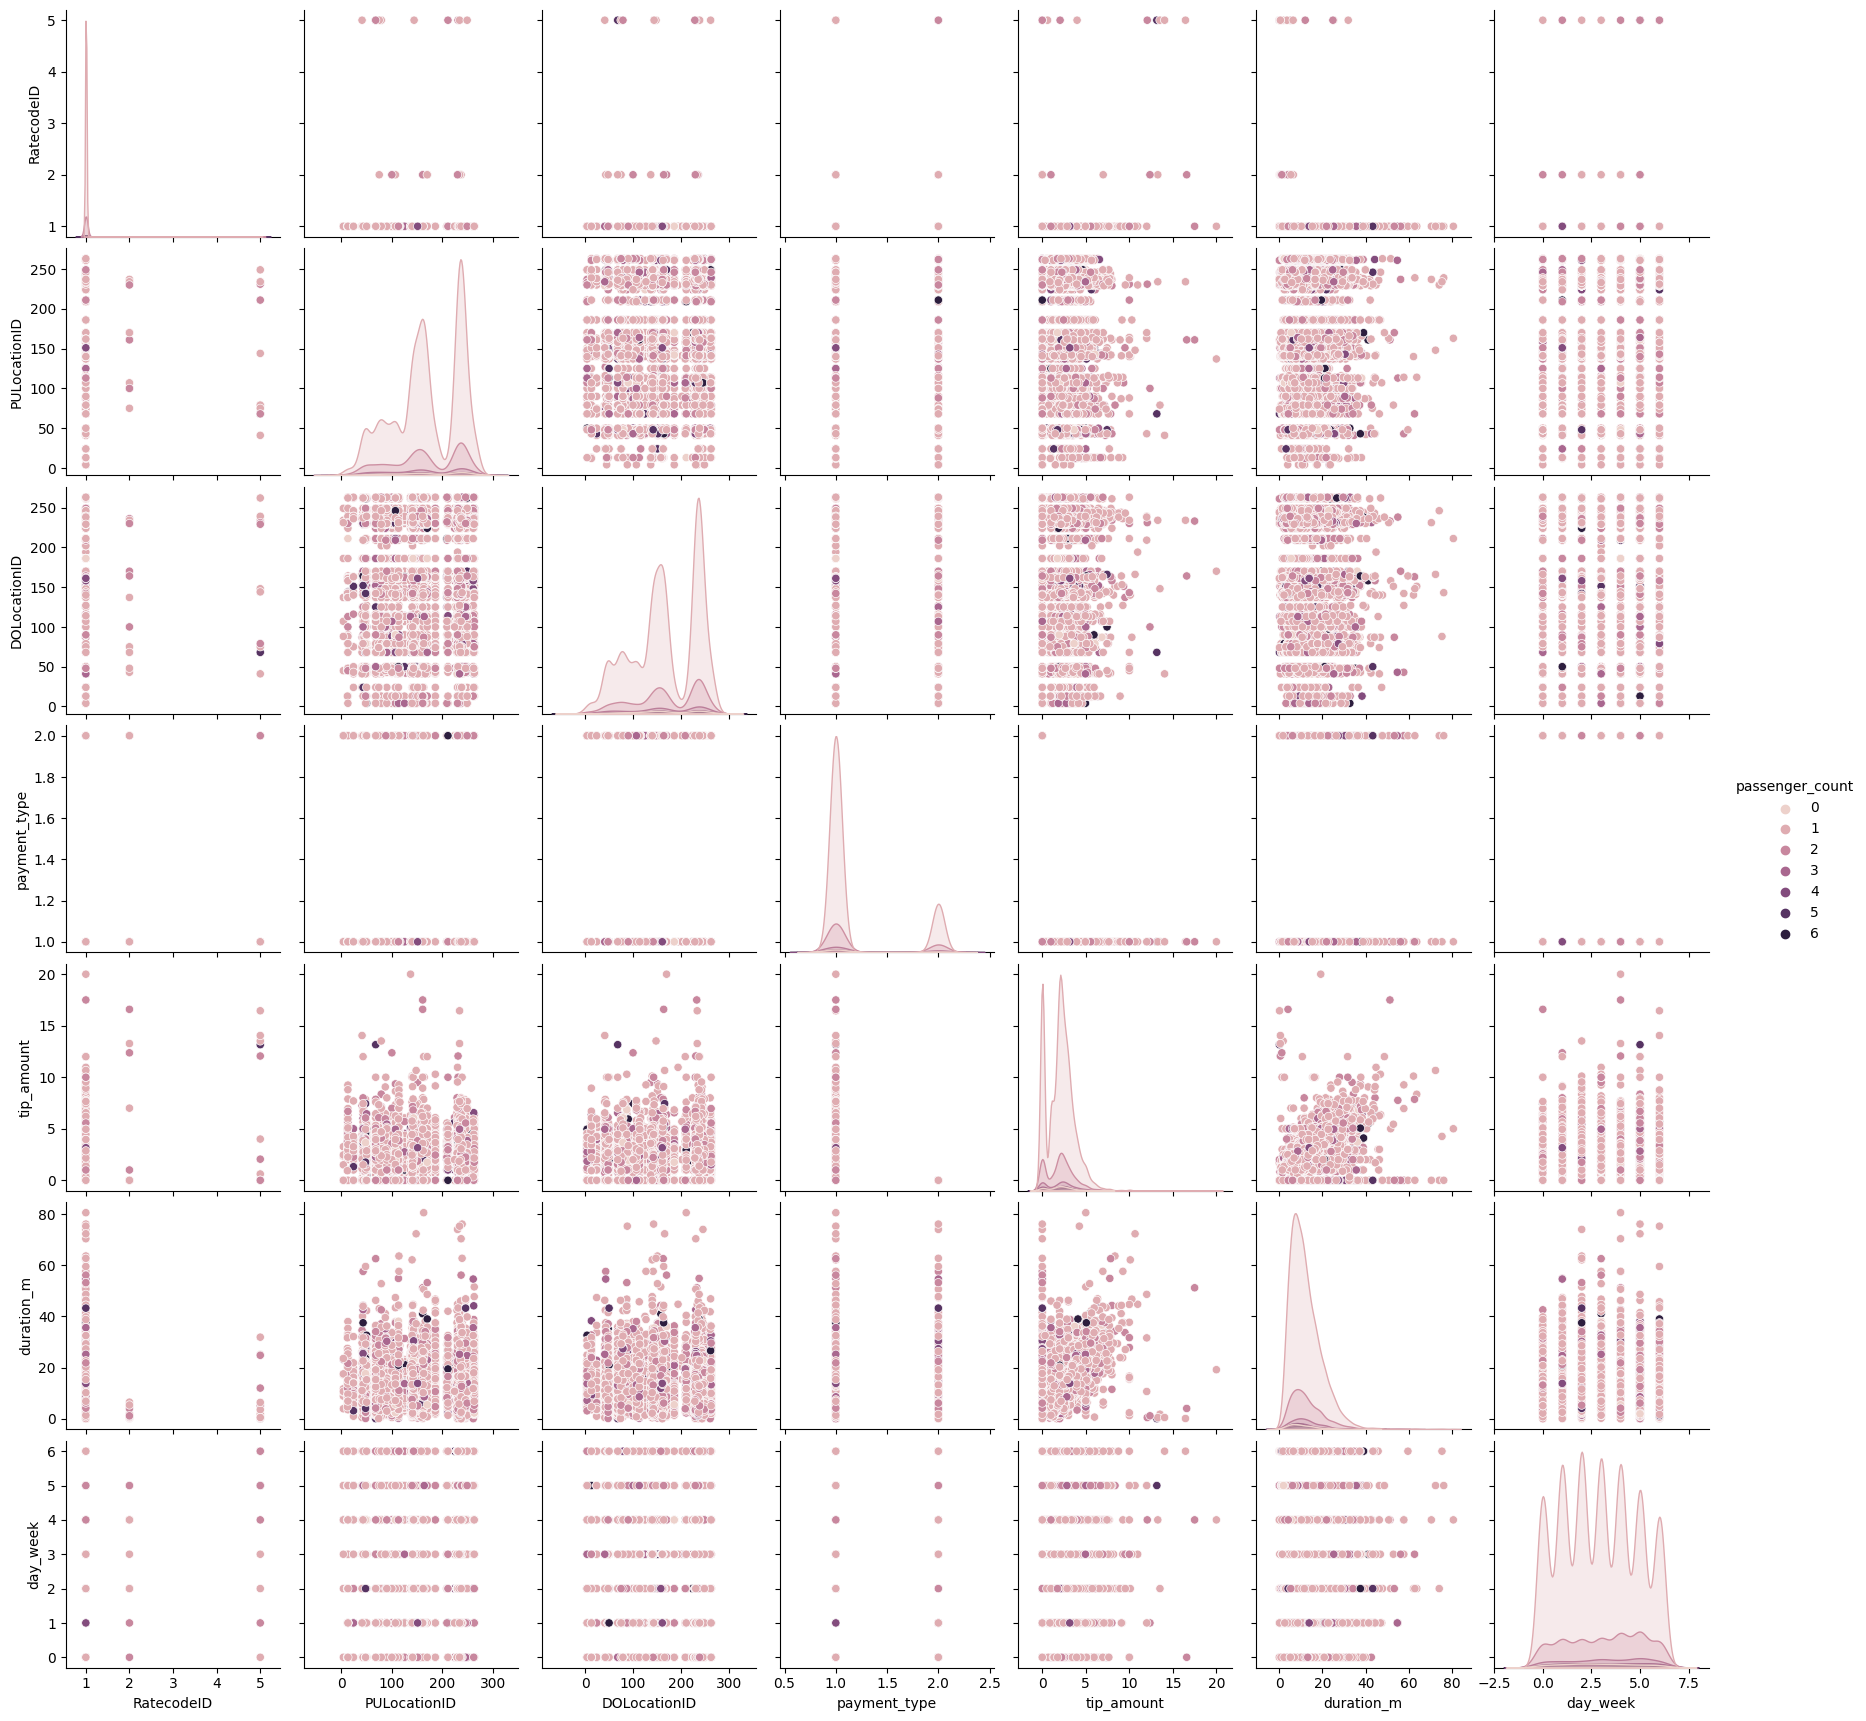

In [51]:
sns.pairplot(df_sample,hue='passenger_count');

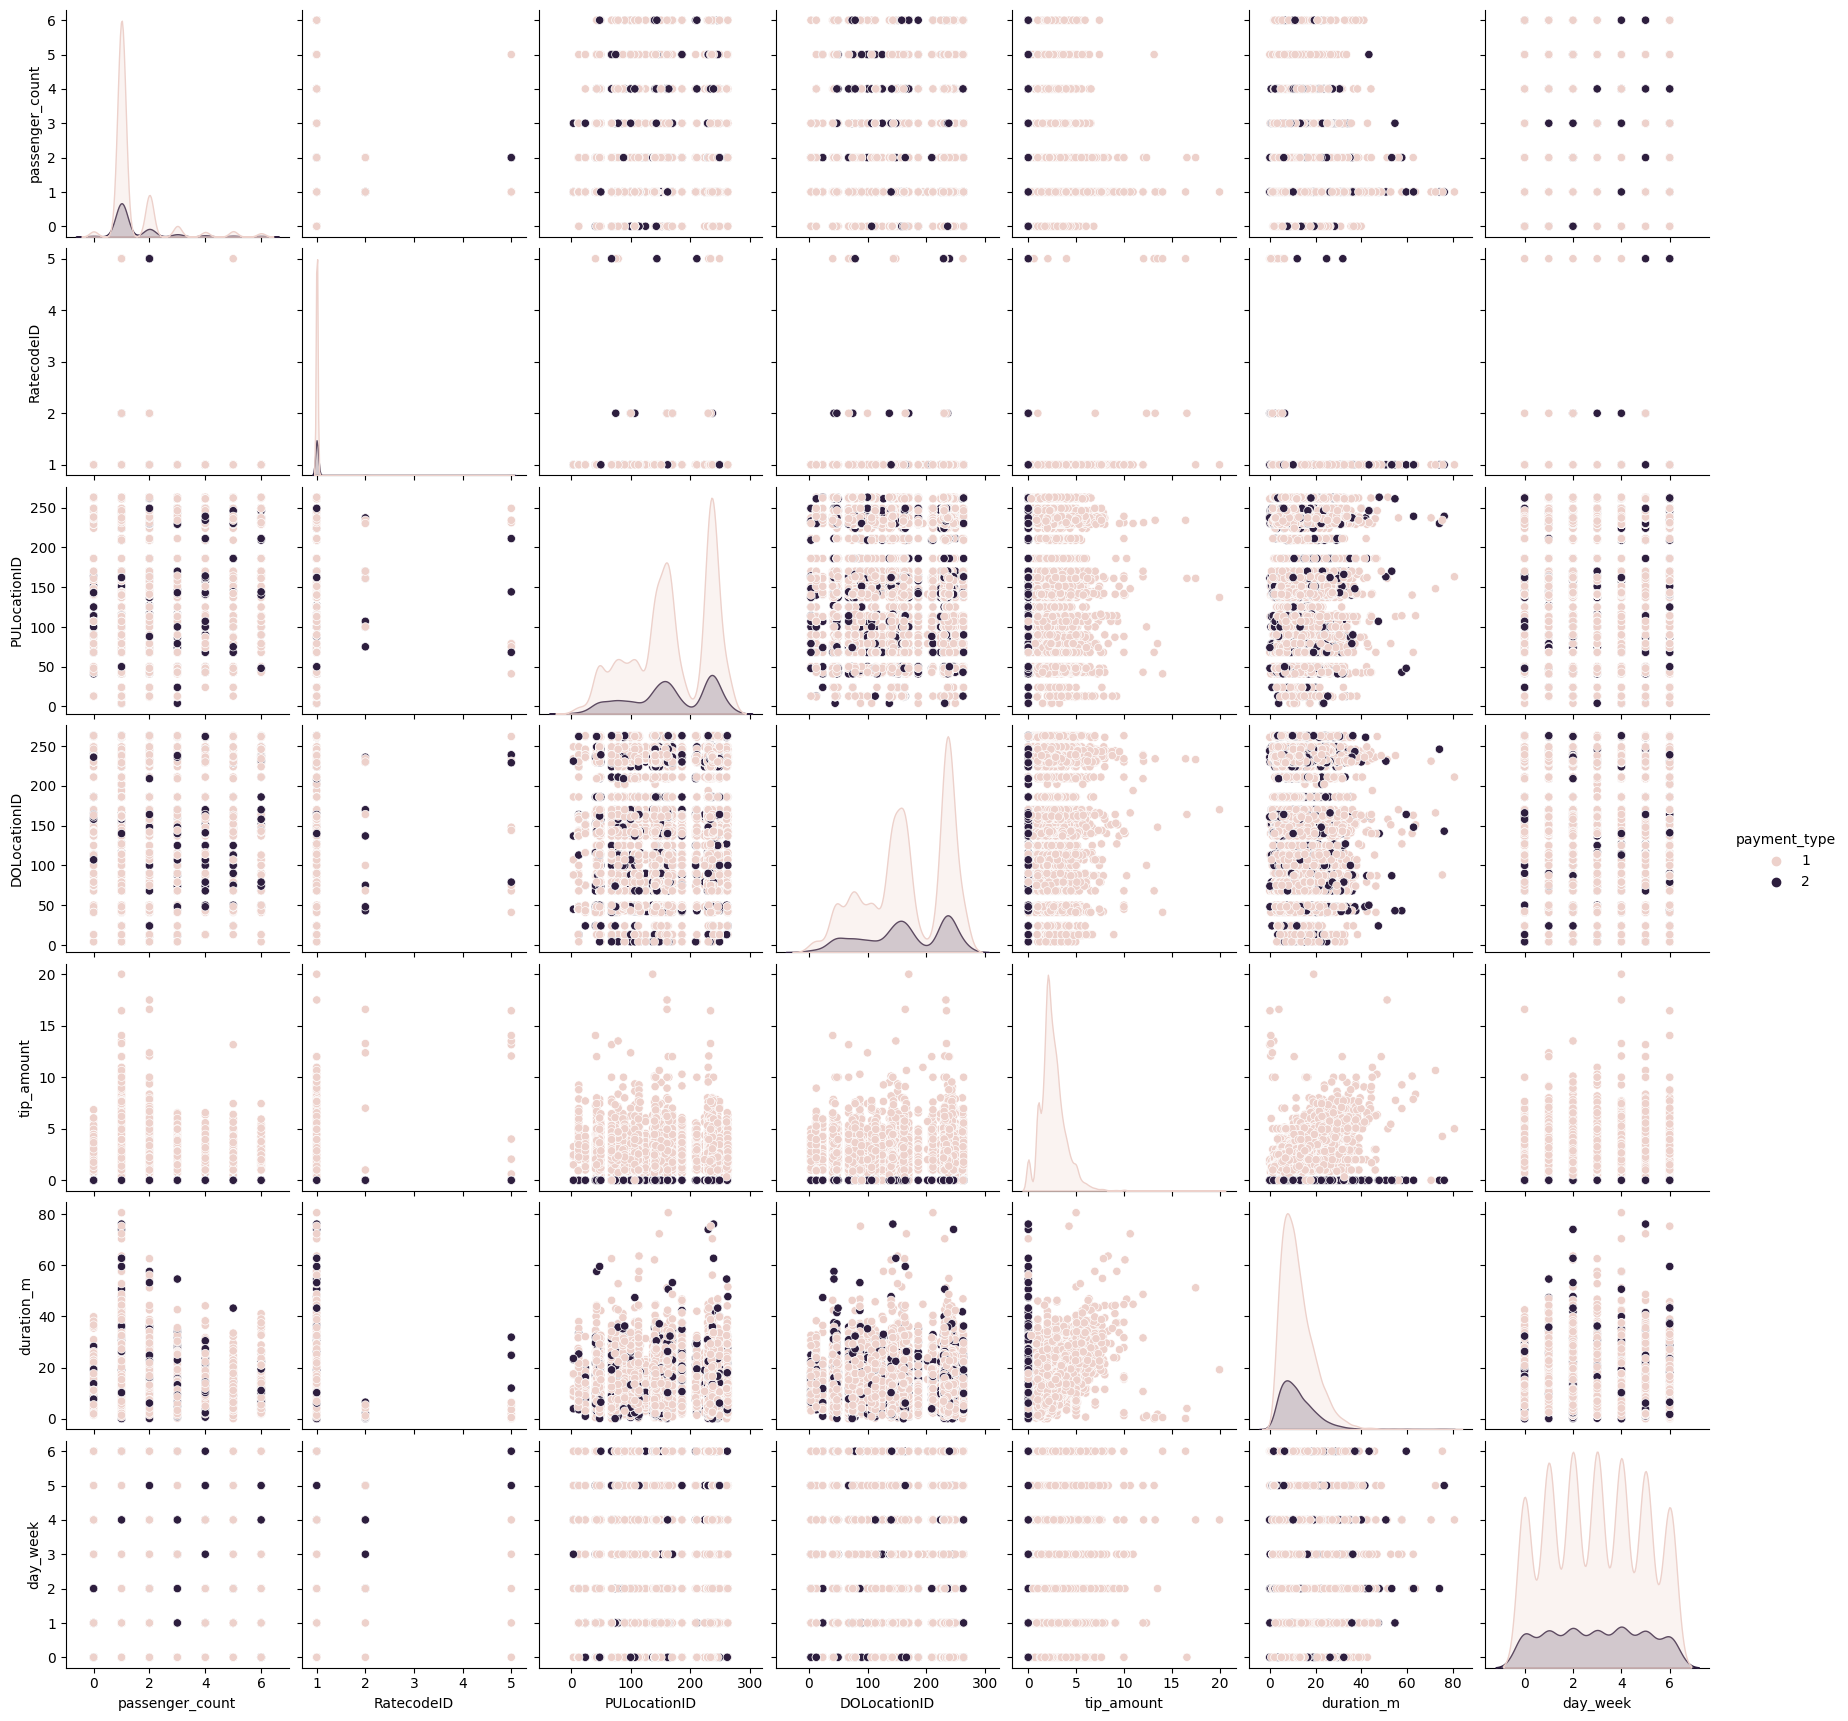

In [47]:
sns.pairplot(df_sample,hue='payment_type');

In [102]:
df_sample['day_of_year'] = df_sample.date.dt.dayofyear

In [112]:
X = df_sample[['tip_amount','duration_m']]

In [113]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X);

C:\Users\a\AppData\Local\Temp\ipykernel_15316\2021189771.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));


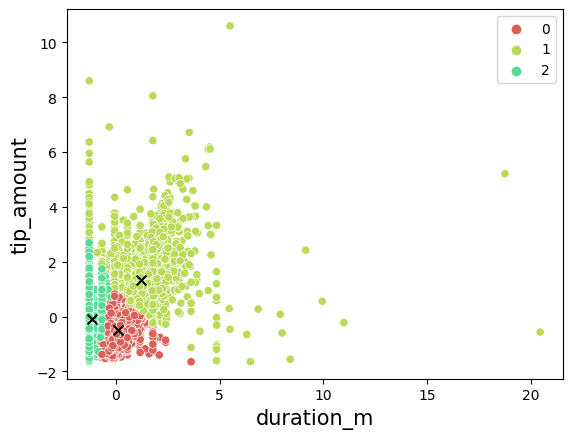

In [115]:
kmeans=KMeans(n_clusters=3,random_state=0) 
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas 
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));
plt.xlabel('duration_m',fontsize=15);plt.ylabel('tip_amount',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');


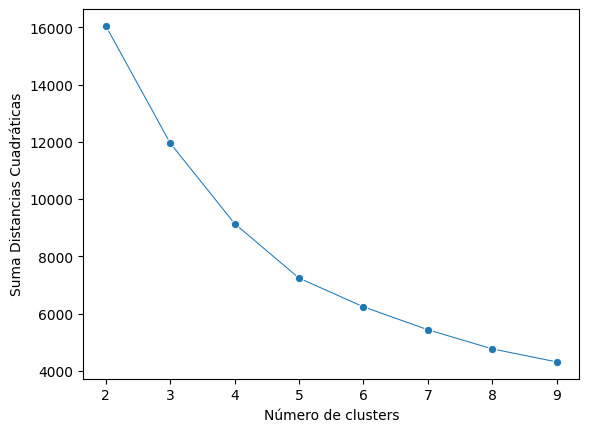

In [116]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=0) 
    kmeans.fit(X_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');    

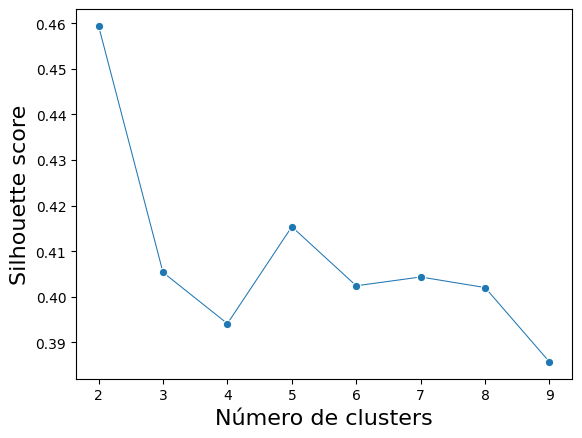

In [62]:
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    score=silhouette_score(X_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16);

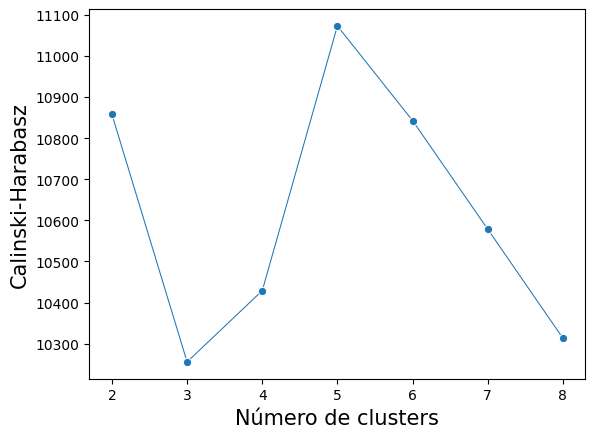

In [74]:
from sklearn.metrics import calinski_harabasz_score

k_values=range(2,9);
ch_scores=[]

for k in k_values:
    
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    score=calinski_harabasz_score(X_scaled,kmeans.labels_)
    ch_scores.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);


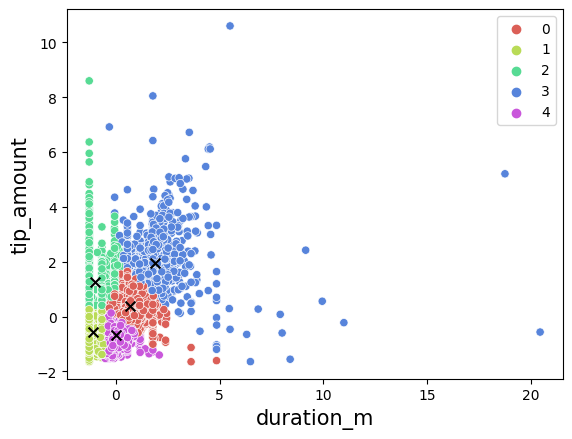

In [117]:
kmeans=KMeans(n_clusters=5,random_state=0) 
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas 
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));
plt.xlabel('duration_m',fontsize=15);plt.ylabel('tip_amount',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');